In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
to_cmplx ={'A':1j,'C':-1,'G':1, 'R':1j, 'M': 1j, 'K':1, 'S':-1,
           'T':-1j, 'Y':-1, 'R':1j, 'W':1j, 'N':1j} #Y->C, T or U; R->A or G; W-> A, T or U;
                                                    #N->A C G T U; R-> A or G; M->A or C; K-> G, T or U
                                                    #S->C or G
rng = np.random.default_rng()
slist= np.array([1,-1,1j,-1j])

def s2cmlx(s):
    return np.array([to_cmplx[c] for c in s])

In [73]:
def similarity(g_a, g_b):
        g_a_rnd = rng.choice(slist,len(g_a))
        g_b_rnd = rng.choice(slist,len(g_b))
        xcorr = np.correlate(g_a, g_b, "full")
        xcorr_rnd = np.correlate(g_a_rnd, g_b_rnd, "full")
        return [np.mean(np.absolute(np.real(xcorr)))/np.mean(np.absolute(np.real(xcorr_rnd))),
                np.max(np.absolute(np.real(xcorr)))/np.max(np.absolute(np.real(xcorr_rnd))),
                len(np.real(xcorr))]
    
def similarity_0(g_a, g_b):
        g_a_rnd = rng.choice(slist,len(g_a))
        g_b_rnd = rng.choice(slist,len(g_b))
        xcorr = np.correlate(g_a, g_b, "full")
        xcorr_rnd = np.correlate(g_a_rnd, g_b_rnd, "full")
        return np.mean(np.absolute(np.real(xcorr)))/np.mean(np.absolute(np.real(xcorr_rnd)))

In [3]:
f = open('./sequence.fasta','r')
virus_names = []
virus_dict = {}
new_genome = False
virus_genome = ""
virus_name = ""

for l in f.readlines():
    if l.startswith('\n'):
        new_genome = False
        virus_dict[virus_name]=s2cmlx(virus_genome)
        #print(f"END{virus_name}")
    if l.startswith('>'):
        new_genome = True
        virus_name = l[1:-1]
        virus_names.append(virus_name)
        virus_genome = ""
        #print(f"START{virus_name}")
    if (l.startswith('A')) or (l.startswith('T')) or (l.startswith('G')) or (l.startswith('C')):
        virus_genome = virus_genome + l[0:-1]
    

f.close()

## Simple Plot

In [27]:
c = np.correlate(virus_dict['NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome'],
             virus_dict['NC_001802.1 Human immunodeficiency virus 1, complete genome'], "full")

[]

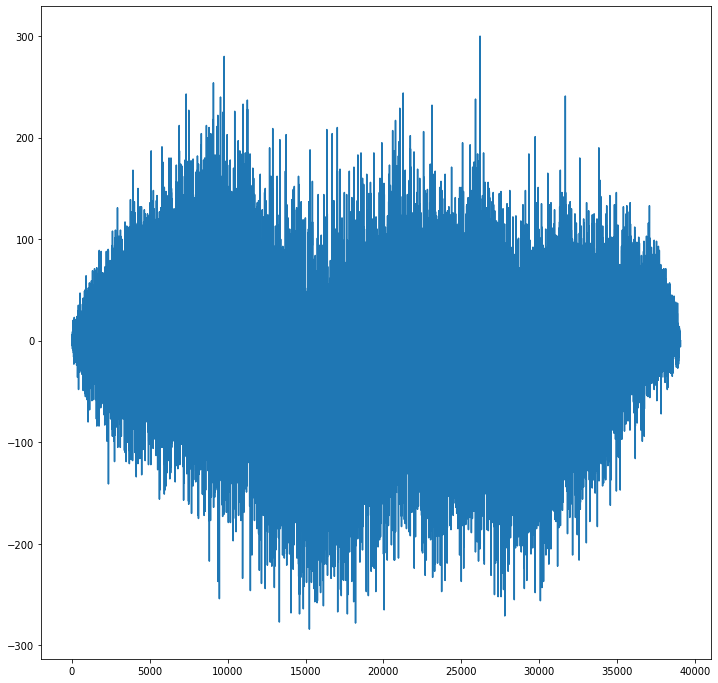

In [28]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(np.real(c))
plt.plot()

## Simple similarity analysis

In [70]:
covid = virus_dict['NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome']
similarity(covid,rng.choice(slist,len(covid)))

[1.001099649038328, 0.9111570247933884, 59805]

In [50]:
similarity_dict={}
for v,g in virus_dict.items():
    if v!='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome':
        covid = virus_dict['NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome']
        similarity_dict[v] = similarity(covid, g)


In [51]:
similarity_df = pd.DataFrame(similarity_dict).transpose()
similarity_df.columns=['Crosscorrelation Mean','Crosscorrelation Max','Crosscorrelation Vector size']

In [72]:
similarity_df.sort_values('Crosscorrelation Mean',ascending=False).head(50)

,Crosscorrelation Mean,Crosscorrelation Max,Crosscorrelation Vector size
"NC_006577.2 Human coronavirus HKU1, complete genome",2.107357,4.503145,59828.0
"NC_005831.2 Human Coronavirus NL63, complete genome",2.005294,4.193182,57455.0
"NC_028752.1 Camel alphacoronavirus isolate camel/Riyadh/Ry141/2015, complete genome",1.800952,3.602941,57297.0
"NC_006213.1 Human coronavirus OC43 strain ATCC VR-759, complete genome",1.780524,4.141667,60643.0
"NC_002645.1 Human coronavirus 229E, complete genome",1.771999,4.399113,57219.0
"NC_003045.1 Bovine coronavirus, complete genome",1.752295,4.988610,60930.0
"NC_004718.3 SARS coronavirus, complete genome",1.736543,26.977413,59653.0
"NC_012986.1 Salivirus A isolate 02394-01, complete genome",1.706998,1.476923,37891.0
"NC_012957.1 Salivirus NG-J1, complete genome",1.682177,1.466135,37884.0
"NC_025114.1 Salivirus FHB, complete genome",1.668863,1.347670,37900.0


## Network

In [ ]:
adj_dict={}
xcorr_mean_thr = 1.55

for i1,(v1,g1) in enumerate(virus_dict.items()):
    adj_dict[v1] = {}
    for i2,(v2,g2)in enumerate(virus_dict.items()):
        if i2>i1:
            xcorrmean = similarity_0(g1,g2)
            x = np.max(np.absolute(xcorr))
            if (x > xcorr_max_thr):
                adj_dict[v1][v2]=x
            